## 数据预处理
### 数据格式化：数据的格式可能不适合我们使用，例如，可能以专有文件格式提供数据，而我们最喜欢使用的机器学习算法却不理解这种格式。
### 数据清洗：数据可能包含无效记录或者缺失记录，它们需要清除或者删除。
### 数据采集：对于我们特定目的来说，数据可能太大了，这就迫使我们对数据进行智能采集。
### 缩放（scaling）：通常，某些机器学习算法要求数据在一个通用的范围内，如零均值和单位方差。缩放就是将所有特征（可能有不同的物理单元）放入一个通用取值范围的过程。
### 分解（decomposition）：通常，数据集有很多我们无法处理的特征。特征分解是将数据压缩成数量更少、信息更丰富的数据分量的过程。
### 聚合（aggregation）：有时，可以将多个特征组合成一个更有意义的特征。例如，一个数据库可能包含登录到基于Web系统的每个用户的日期和时间。根据不同的任务，通过简单地计算每个用户的登录次数，可以更好地表示这些数据。

### 特征标准化

In [1]:
from sklearn import preprocessing
import numpy as np
X = np.array([[ 1., -2.,  2.],
              [ 3.,  0.,  0.],
              [ 0.,  1., -1.]])

In [2]:
# 利用scale函数可以实现对数据矩阵X的标准化
X_scaled = preprocessing.scale(X)
X_scaled

array([[-0.26726124, -1.33630621,  1.33630621],
       [ 1.33630621,  0.26726124, -0.26726124],
       [-1.06904497,  1.06904497, -1.06904497]])

### 特征归一化

使用normalize函数进行归一化，L1范数由norm关键字指定：

In [3]:
X_normalized_l1 = preprocessing.normalize(X, norm='l1')
X_normalized_l1

array([[ 0.2, -0.4,  0.4],
       [ 1. ,  0. ,  0. ],
       [ 0. ,  0.5, -0.5]])

类似地，可以通过指定norm='12'来计算L2范数：

In [4]:
X_normalized_l2 = preprocessing.normalize(X, norm='l2')
X_normalized_l2

array([[ 0.33333333, -0.66666667,  0.66666667],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.70710678, -0.70710678]])

### 将特征缩放到一个范围

使用MinMaxScaler来实现：

In [5]:
min_max_scaler = preprocessing.MinMaxScaler()
X_min_max = min_max_scaler.fit_transform(X)
X_min_max

array([[0.33333333, 0.        , 1.        ],
       [1.        , 0.66666667, 0.33333333],
       [0.        , 1.        , 0.        ]])

通过向MinMaxScaler构造函数传递一个关键字参数feature_range，我们可以指定各种范围：

In [6]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-10, 10))
X_min_max2 = min_max_scaler.fit_transform(X)
X_min_max2

array([[ -3.33333333, -10.        ,  10.        ],
       [ 10.        ,   3.33333333,  -3.33333333],
       [-10.        ,  10.        , -10.        ]])

### 特征二值化

假设这些数字表示我们银行账户中的数千美元。如果一个人的账户超过0.5万美元，我们就认为他是个富人，用1来表示。否则，就用0表示。这类似于用threshold=0.5对数据进行阈值处理：

In [7]:
binarizer = preprocessing.Binarizer(threshold=0.5)
X_binarized = binarizer.transform(X)
X_binarized

array([[1., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

### 缺失数据的处理

scikit-learn提供了3种不同的策略来估算缺失值：

+ mean：用矩阵一个指定轴上的平均值（默认axis=0）替换所有的nan值。

+ median：用矩阵一个指定轴上的中值（默认axis=0）替换所有的nan值。

+ most_frequent：用矩阵一个指定轴上的最频繁值（默认axis=0）替换所有的nan值。

In [8]:
from numpy import nan
X = np.array([[ nan, 0,   3  ],
              [ 2,   9,  -8  ],
              [ 1,   nan, 1  ],
              [ 5,   2,   4  ],
              [ 7,   6,  -3  ]])

mean估算：

In [9]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='mean')
X2 = imp.fit_transform(X)
X2

array([[ 3.75,  0.  ,  3.  ],
       [ 2.  ,  9.  , -8.  ],
       [ 1.  ,  4.25,  1.  ],
       [ 5.  ,  2.  ,  4.  ],
       [ 7.  ,  6.  , -3.  ]])

median估算：

In [10]:
imp = SimpleImputer(strategy='median')
X3 = imp.fit_transform(X)
X3

array([[ 3.5,  0. ,  3. ],
       [ 2. ,  9. , -8. ],
       [ 1. ,  4. ,  1. ],
       [ 5. ,  2. ,  4. ],
       [ 7. ,  6. , -3. ]])

## 理解降维

通常，数据集有很多我们无法处理的特征。例如，假设我们的任务是预测一个国家的贫困率。我们可能会先将一个国家的名字与其贫困率匹配，但是这并不能帮助我们预测一个新国家的贫困率。因此，我们开始思考贫困的可能原因。但是可能导致贫困的原因有多少呢？因素可能包括：一个国家的经济、缺乏教育、高离婚率、人口过剩等。如果每一个原因都是用来帮助预测贫困率的特征，那么我们最终可能会得到无数的特征。如果你是一个数学家，你可能会把这些特征想象成高维空间中的坐标轴，那么每个国家的贫困率是这个高维空间中的一个点。

### 用OpenCV实现主成分分析

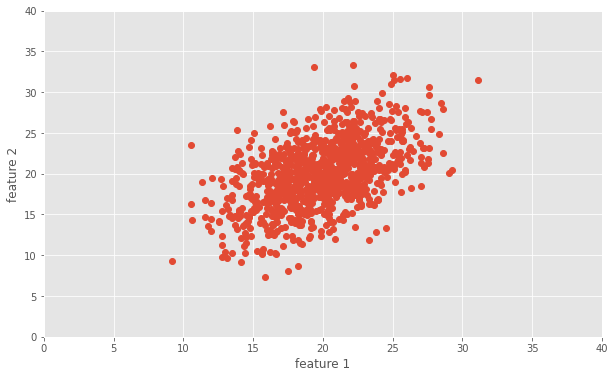

In [11]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

mean = [20, 20]
cov = [[12, 8], [8, 18]]
np.random.seed(42)
x, y = np.random.multivariate_normal(mean, cov, 1000).T
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'o', zorder=1)
plt.axis([0, 40, 0, 40])
plt.xlabel('feature 1')
plt.ylabel('feature 2');

In [12]:
# 将特征向量x和y叠加成一个特征矩阵X：
X = np.vstack((x, y)).T
import cv2
mu, eig = cv2.PCACompute(X, np.array([]))
eig

array([[ 0.57128392,  0.82075251],
       [ 0.82075251, -0.57128392]])

Text(0, 0.5, 'feature 2')

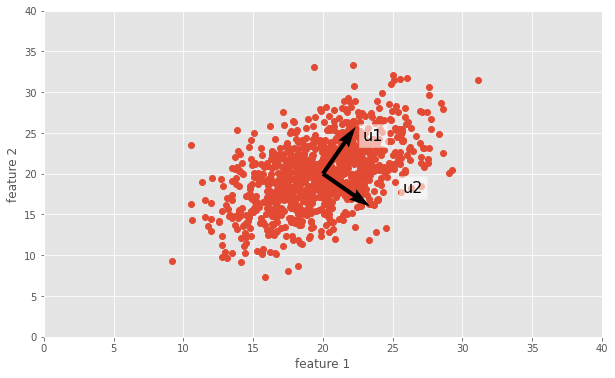

In [13]:
# 函数返回两个值：在投影之前减去均值（mean）和协方差矩阵的特征向量（eig）
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'o', zorder=1)
plt.quiver(mean[0], mean[1], eig[0, 0], eig[0, 1], zorder=3, scale=0.2, units='xy')
plt.quiver(mean[0], mean[1], eig[1, 0], eig[1, 1], zorder=3, scale=0.2, units='xy')
plt.text(mean[0] + 5 * eig[0, 0], mean[1] + 5 * eig[0, 1], 'u1', zorder=5, fontsize=16, bbox=dict(facecolor='white', alpha=0.6))
plt.text(mean[0] + 7 * eig[1, 0], mean[1] + 4 * eig[1, 1], 'u2', zorder=5, fontsize=16, bbox=dict(facecolor='white', alpha=0.6))
plt.axis([0, 40, 0, 40])
plt.xlabel('feature 1')
plt.ylabel('feature 2')

我们预先确定的x轴和y轴对于描述我们选择的数据并不是那么有意义。因为所选数据的分布角度大约是45度，所以选择u1和u2作为坐标轴比选择x和y更有意义。

可以使用cv2.PCAProject旋转数据：

(-20.0, 20.0, -10.0, 10.0)

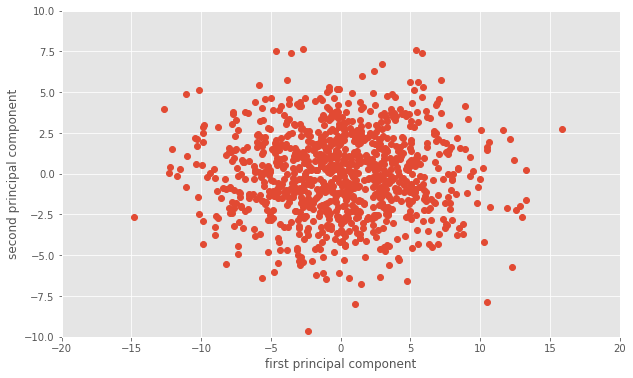

In [14]:
X2 = cv2.PCAProject(X, mu, eig)
plt.figure(figsize=(10, 6))
plt.plot(X2[:, 0], X2[:, 1], 'o')
plt.xlabel('first principal component')
plt.ylabel('second principal component')
plt.axis([-20, 20, -10, 10])

### 实现独立成分分析

独立成分分析（Independent Component Analysis，ICA）执行与PCA相同的数学步骤，但是ICA选择分解的各个分量尽可能地相互独立，这和PCA中的每个预测因子不同。

在scikit-learn中，从decomposition模块可以获得ICA：

(-0.2, 0.2, -0.2, 0.2)

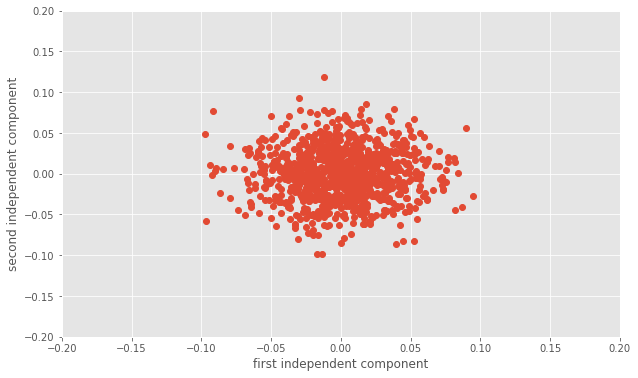

In [15]:
from sklearn import decomposition
ica = decomposition.FastICA(tol=0.005)
X2 = ica.fit_transform(X)
plt.figure(figsize=(10, 6))
plt.plot(X2[:, 0], X2[:, 1], 'o')
plt.xlabel('first independent component')
plt.ylabel('second independent component')
plt.axis([-0.2, 0.2, -0.2, 0.2])

### 实现非负矩阵分解

即NMF只对非负数据进行运算。或者说，如果我们想要使用NMF，那么在我们的特征矩阵中就不能有负值；分解生成的分量也全都是非负值。

(0.0, 2.0, -1.0, 2.0)

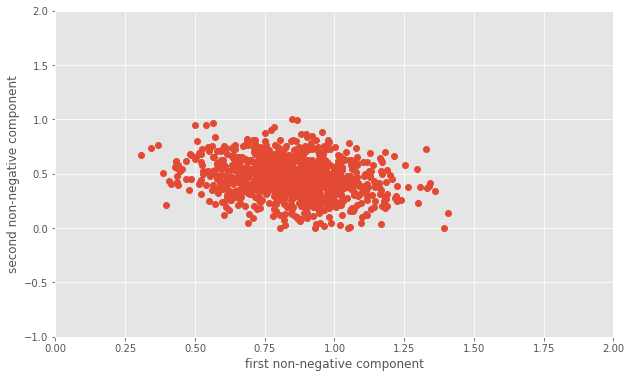

In [16]:
nmf = decomposition.NMF()
X2 = nmf.fit_transform(X)
plt.figure(figsize=(10, 6))
plt.plot(X2[:, 0], X2[:, 1], 'o')
plt.xlabel('first non-negative component')
plt.ylabel('second non-negative component')
plt.axis([0, 2, -1, 2])